# Линейная алгебра. Лабораторная работа 1, зима 2022, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [3]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [4]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
Z = np.zeros([3,4])
Z


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [7]:
np.trace(np.diag([1,2,3,4,5]))

15

In [8]:
sla.inv(np.diag([1,2,3,4,5]))

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [9]:
X = np.random.rand(4,5)
X

array([[0.28988949, 0.71165798, 0.70711857, 0.91739159, 0.41627584],
       [0.76547132, 0.83295096, 0.85854776, 0.2473202 , 0.73747922],
       [0.96675285, 0.77225032, 0.61570465, 0.19386947, 0.61160663],
       [0.29183415, 0.90982169, 0.99412397, 0.01029193, 0.12591547]])

In [10]:
sla.det(X[1:3,0:2])


-0.21412224059391421

In [11]:
X.T.dot(X)

array([[1.6897605 , 1.85599448, 1.74753348, 0.6456861 , 1.31321207],
       [1.85599448, 2.62441045, 2.59830842, 1.01795422, 1.49740409],
       [1.74753348, 2.59830842, 2.60449561, 0.99063862, 1.42926215],
       [0.6456861 , 1.01795422, 0.99063862, 0.9404659 , 0.68414923],
       [1.31321207, 1.49740409, 1.42926215, 0.68414923, 1.10707856]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [12]:
def my_det(X1):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    
    # Your code here
    X = X1.copy()
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i][j] = float(X[i][j])
    #print(X)
    det = 1.
    currow = 0
    if X.shape[0] !=X.shape[1]:
        raise ValueError
    
    for currcol in range(X.shape[1]):

        maxnum =  -1e9
        maxi = -1
        for j in range(currow, X.shape[0]):
            if X[j][currcol] >maxnum:
                maxnum = X[j][currcol]
                maxi = j
        if maxnum == 0:
            continue
        # print(X)
        # print()
        X[[maxi,currow]] =X[[currow,maxi]]
        # print(X)
        # print()
        if maxi != currow:
            det*=-1
        det *= X[currow][currcol]
   
        X[currow] = X[currow] / X[currow][currcol]

        X[currow][currcol] = 1
        for j in range(currow +1,X.shape[0]):
            if X[j][currcol] == 0:
                continue
            X[j] = X[j] - X[currow]*X[j][currcol]
            X[j][currcol] = 0
        currow+=1
    #print(det)
    #print(X)
    for i in range(X.shape[0]):
        det *=X[i][i]
    #print(det)
    return det

Простая проверка:

In [13]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [14]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно. 

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

19.7 µs ± 944 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
739 µs ± 63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
24.6 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.8 ms ± 9.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14656\3926899206.py:41: RuntimeWarning: overflow encountered in double_scalars
  det *= X[currow][currcol]


3.05 s ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


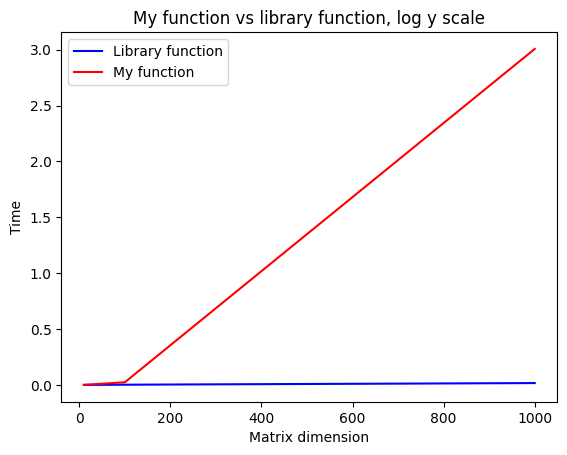

In [15]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

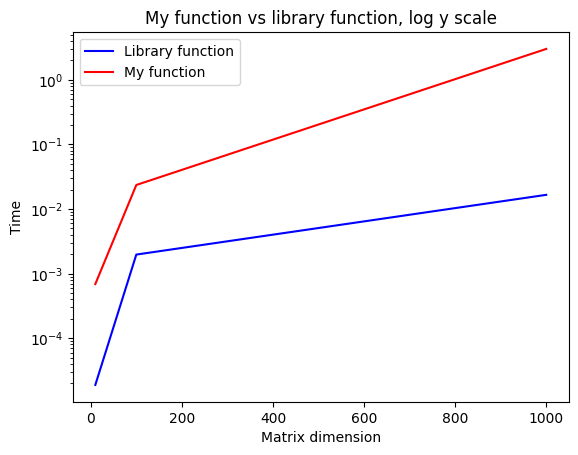

In [16]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [17]:
# Your code here
X1 = np.array([ [1,0],
                [10**20,1] ])
Y1 = np.array([[(10)**(-20),1],
              [0,1-(10)**20] ])
np.dot(X1,Y1)


array([[1e-20, 1],
       [1.0, 1]], dtype=object)

In [18]:
X2 = np.array([[1.,0.],[(10.)**20,1.]])
Y2 = np.array([[(10.)**(-20),1.],[0.,1.-(10.)**20]])
np.dot(X2, Y2)


array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

И какой из них правильный?

---
**Напишите здесь свой ответ**

Правильный ответ - первый

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [19]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    P = P.astype(int)
    # Your code here
    P[0][0] = 1
    for i in range(dim*2+1):
        x = i
        y = 0
        while y<dim:
            if x >=dim:
                x-=1
                y+=1
                continue
            if x == 0 or y == 0:
                P[x][y] = 1
            else:
                P[x][y] = P[x-1][y]+ P[x][y-1]
            x-=1
            y+=1
    

    return P

In [114]:
print(my_pascal(6))

[[  1   1   1   1   1   1]
 [  1   2   3   4   5   6]
 [  1   3   6  10  15  21]
 [  1   4  10  20  35  56]
 [  1   5  15  35  70 126]
 [  1   6  21  56 126 252]]


Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Так как эта матрица является произведением нижнетреугольной матрицы паскаля на верхнетреугольную(а у обеих этих матриц det = 1) определитель этой матрицы равен 1.
Также вычитая из n-ой строки n-1 - ую: получится n-я строка, сдвинутая направо, также с n-1-ой, n-2-ой...
таким образом получается матрица сдвинутая вправо:
$\begin{pmatrix}
1 & 1 & 1 & 1 & 1\\
1 & 2 & 3 &4 &5\\
1 & 3 & 6 & 10 & 15\\
1 & 4 & 10 & 20 & 35\\
1 & 5 & 15 & 35 & 70 
\end{pmatrix}  
\rightarrow \begin{pmatrix}
1 & 1 & 1 & 1 & 1\\
 0 &1 & 2 & 3 &4 \\
0 & 1 & 3 & 6 & 10 \\
0 & 1 & 4 & 10 & 20 \\
0 & 1 & 5 & 15 & 35 
\end{pmatrix} $

после n таких операций получится диагональная матрица с еденицами на диагонали

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [20]:
# Your code heres
sla.det(my_pascal(30))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14656\3724334604.py:21: RuntimeWarning: overflow encountered in long_scalars
  P[x][y] = P[x-1][y]+ P[x][y-1]


-6.844154074342149e+185

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

Не забудьте написать тесты, которые будут проверять корректность ваших функций.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [21]:
#считаю что нужно произведение квадратов
def prod_and_sq_sum(A):
    x1 =np.prod(A.diagonal())*np.prod(A.diagonal())
    x2 = sum(A.diagonal()**2)
    return x1,x2


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [22]:
def f(a,b,k):
    a1 = a.T
    b1 = b.T
    a1 = a1[0:min(k,a.shape[0])]
    b1 = b1[0:min(k,a.shape[0])]

    print(a1,b1)
    return(np.einsum('ji,jk->ik',a1,b1))
    


In [23]:
a = np.array([[1,2],[4,1]])
b = np.array([[3,7],[8,9]])
f(a,b,2)

[[1 4]
 [2 1]] [[3 8]
 [7 9]]


array([[17, 26],
       [19, 41]])

**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [24]:
def get_diag(A,B):
    print(A)
    print(B.T)
    return np.einsum('ij,ji->i',A,B)


In [25]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
get_diag(a,b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


array([ 30,  81, 150])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

Ваша функция должна работать для любой точки корректно.

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка). Ваша функция должна работать для любой точки корректно.

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)). Ваша функция должна работать для любой точки корректно

In [113]:
import math
def shrink_rotate(x, a, coef=1., angle=0.):
    xa = x -a
    xa *= coef
    xa *= math.cos(angle) + math.sin(angle)*1j
    return xa+a
    
    
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    # Your code here
    x1 = shrink_rotate(x,a,coef, angle)
    
    return x1.conjugate() +a
    
    
def geometric_inverse(x, a, r):
    # Your code here
    return shrink_rotate(x,a,r*r/((x).__abs__))

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

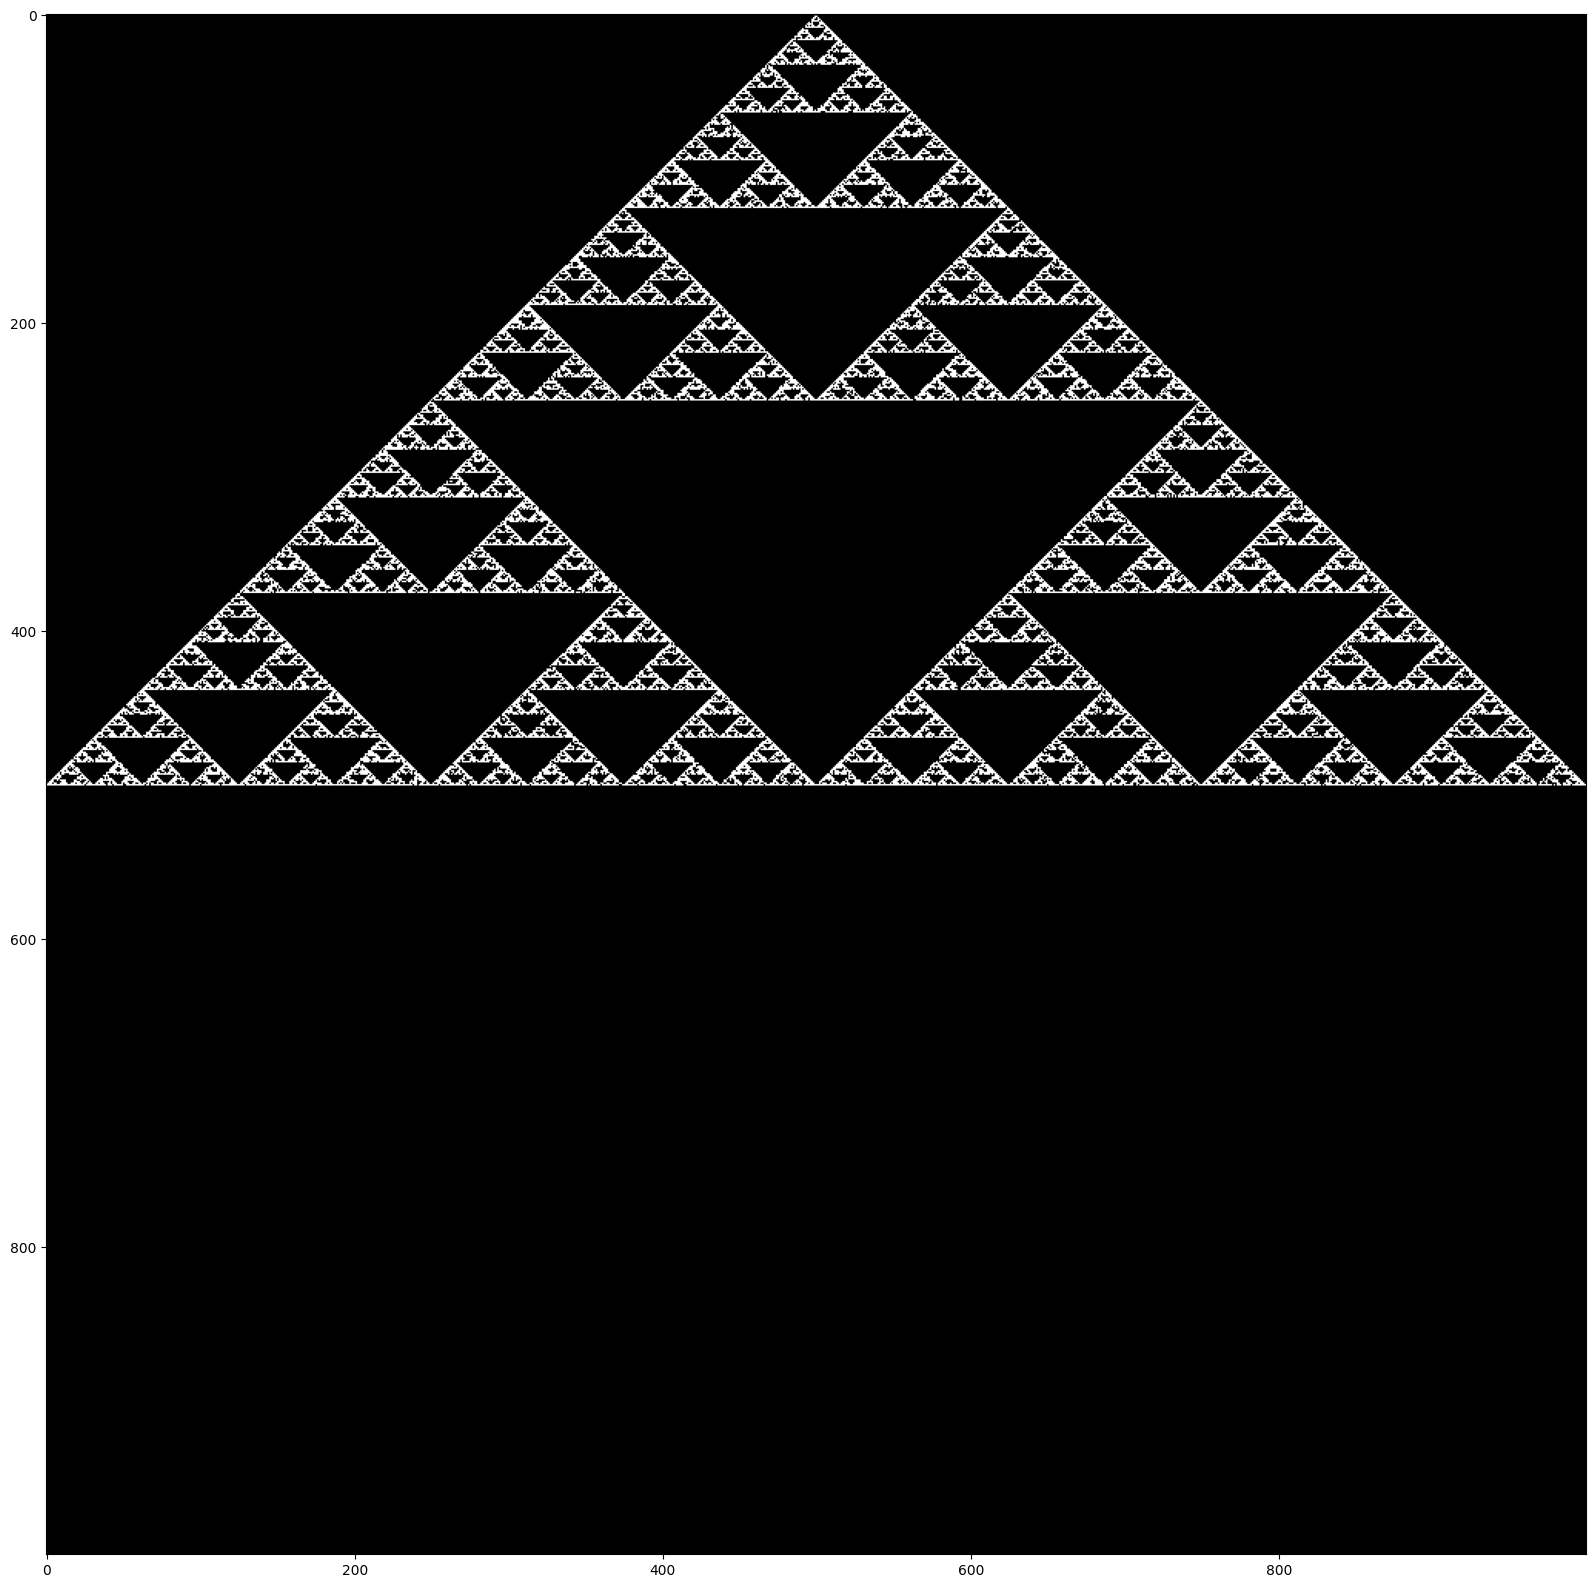

In [39]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
t = []
for i in range(1000):
    t.append([0]*1000)
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    #print(int(z.real*1000),int(z.imag*1000))
    t[1000-(int(z.imag*500+500))][(int(z.real*500+500))] = 1
plt.figure(figsize=(20, 20))
plt.imshow(np.array(t),cmap = 'gray')



**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

Довольно известный факт, что если взять 3 точки, составляющиетреугольник, взять случайную точку внутри треугольника и на каждом шаге уменьшать расстояние между точкой и случайной из трёх опорных точек в 2 раза, точка будет выписывать треугольник Серпинского.

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

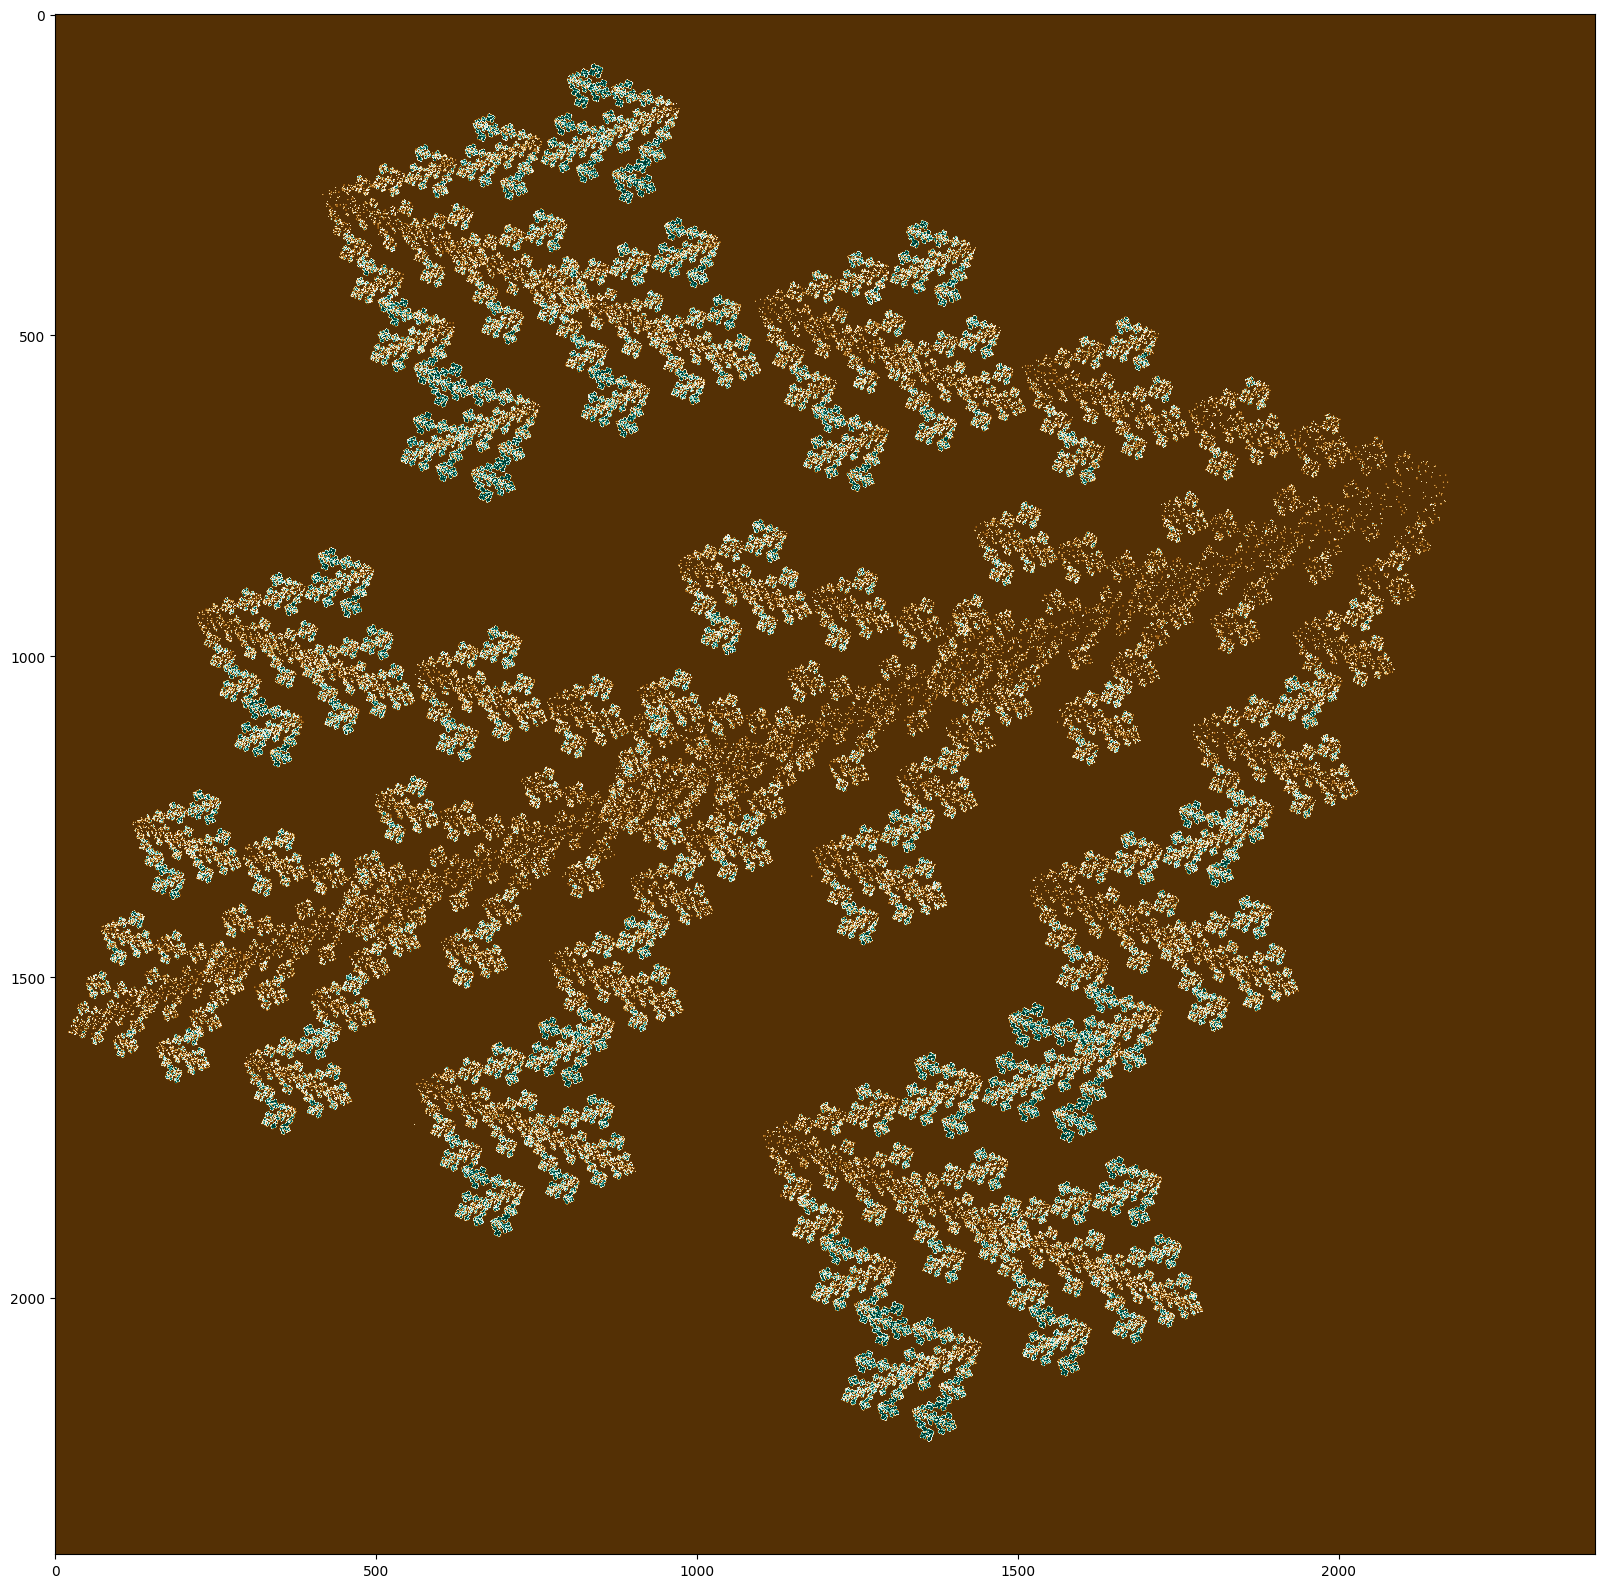

In [28]:
import random
import scipy.constants as scp
z = 0.5 + 0.*1j
max_iter = 600000

x1 = -3+3*1j
y1 = 3 + 3*1j
z1 = -3 - 3*1j
x2 = 3-3*1j
x1/=10
y1 /=10
z1 /=10
x2/=10

funcs = [
    (lambda t: shrink_rotate(t, x1, coef=1/scp.golden, angle=0.)),
    (lambda t: shrink_rotate_conj(t, y1, coef=1/math.pi, angle=0.)),
    (lambda t: shrink_rotate_conj(t, z1, coef=1/math.pi, angle=0.)),
    (lambda t: shrink_rotate(t,x2, coef=0.5, angle=0.)),

]
t = []
for i in range(2400):
    t.append([0]*2400)
for n_iter in range(max_iter):
    g = random.randint(1,100)
    n_func = None

    n_func = np.random.choice([0,1,2,3])

    #n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    #print(int(z.real*1000),int(z.imag*1000))
    t[(int((z.real*1000-1000)*1.45+200))][(int((z.imag*1000-1000)*3.6+2300))] = 1
plt.figure(figsize=(20, 20))
plt.imshow(np.array(t),cmap = 'BrBG')



Мне было скучно:

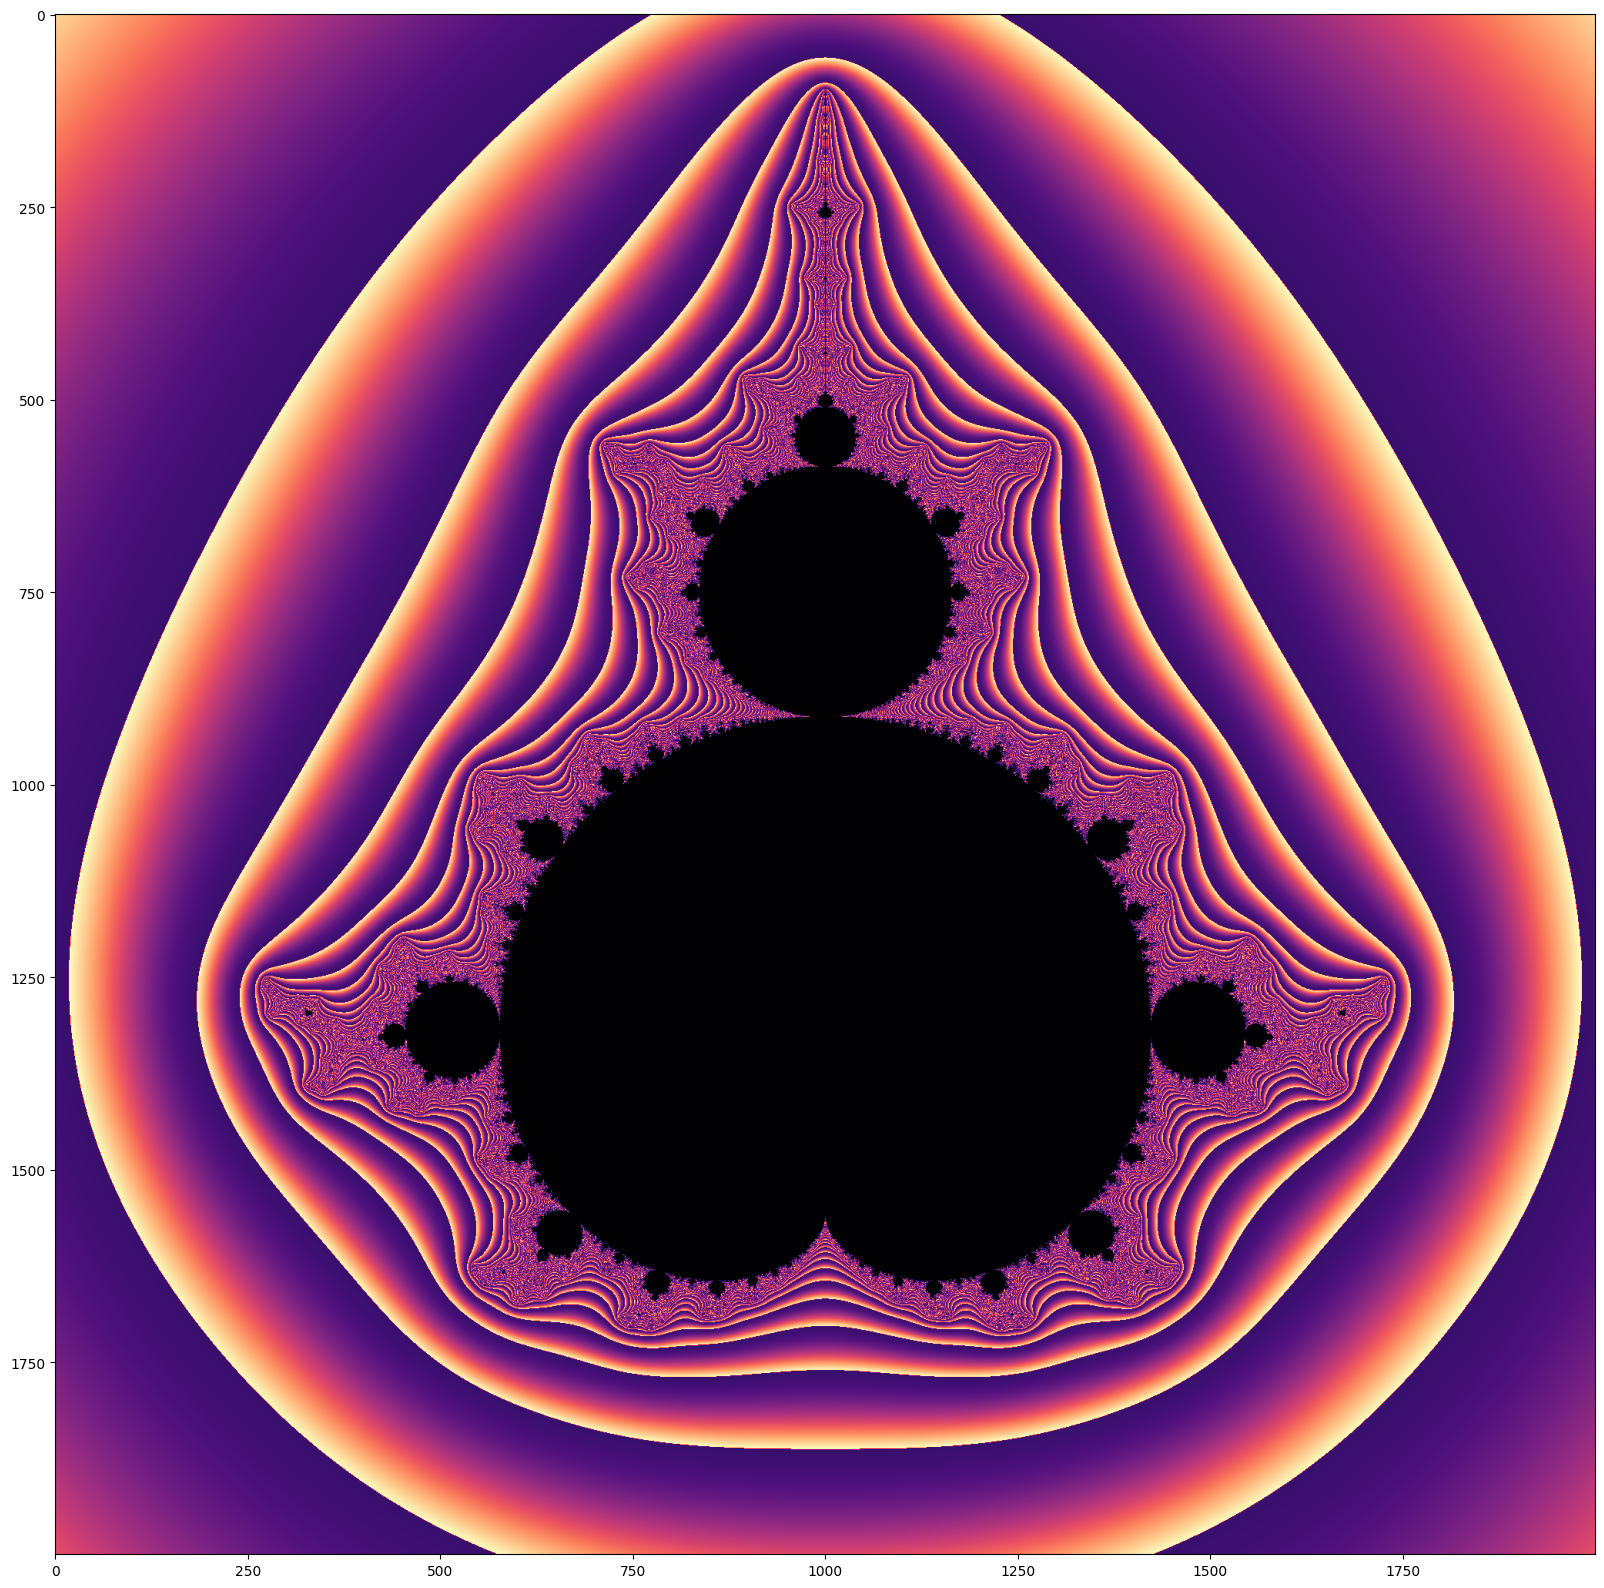

In [29]:
n = 2000
t = []
for i in range(n):
    t.append([0]*n)
for i in range(n):
    for j in range(n):


        c = (i-1400)/650+(j-1000)/650*1j
        z = 0
        for _ in range(100):
            z = z*z+c
            if z.__abs__()>1000:
                break
        if z.__abs__() <1000:
            t[i][j] = 0
        else:
            t[i][j] = math.log(z.__abs__()/10000+1) +1

plt.figure(figsize=(20, 20))
plt.imshow(np.array(t),cmap = 'magma')


## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 221:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 222:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 223:

`A = np.array([[6,-3,-5,-3],[-7,4,6,4],[9,-3,-6,-5],[-3,-2,0,2]])`

- у группы 224:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

Заметим, что для взятия производных и нахождения корней многочлена не обязательно использовать программы. 

Найдём корни хар многочлена А:

In [37]:
A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])
print(np.roots(np.poly(A)))


[-5.+5.46955615e-07j -5.-5.46955615e-07j -4.+5.23220492e-07j
 -4.-5.23220492e-07j]


корни - -5 и -4
Теперь методом неопределённых коэффициентов найдем коэффициенты нужного многочлена $g_\phi$ для каждой матрицы:
$g_\phi = ax^3+bx^2+cx+d$


In [60]:

x1 = -5
x2 = - 4
a = np.array([[x1**3,x1**2,x1,1],[x2**3,x2**2,x2,1],[3*x1**2,2*x1,1,0],[3*x2**2,2*x2,1,0]])
b = np.array([math.exp(-5),math.exp(-4),math.exp(-5),math.exp(-4)])
t1 = np.linalg.solve(a,b)

a = np.array([[x1**3,x1**2,x1,1],[x2**3,x2**2,x2,1],[3*x1**2,2*x1,1,0],[3*x2**2,2*x2,1,0]])
b = np.array([math.sin(-5),math.sin(-4),math.cos(-5),math.cos(-4)])
t2 = np.linalg.solve(a,b)
# print(t1)


In [61]:
a = np.array([[x1**3,x1**2,x1,1],[x2**3,x2**2,x2,1],[3*x1**2,2*x1,1,0],[3*x2**2,2*x2,1,0]])
b = np.array([math.cos(-5),math.cos(-4),-math.sin(-5),-math.sin(-4)])
t3 = np.linalg.solve(a,b)

S = np.zeros([4,4])
T = np.zeros([4,4])
B = np.zeros([4,4])
curri = np.eye(4)

for i in range(3,-1,-1):
    B+=curri*t1[i]
    S += curri*t2[i]
    T+=curri*t3[i]
    curri = np.dot(curri,A)
print(B)
print(S)
print(T)

print('Равенство выполняется:')
print(np.dot(S,S)+np.dot(T,T))

[[ 0.         -0.03179153  0.03663128  0.06168486]
 [ 0.00673795  0.0153741   0.01157769  0.00967949]
 [-0.00673795  0.00294154 -0.01157769 -0.02799513]
 [ 0.00673795 -0.00294154  0.02989333  0.04631077]]
[[ 0.67526209 -0.64886478 -0.57210321 -0.20690062]
 [ 0.28366219  2.01203261 -0.93730581 -1.70675196]
 [-0.28366219 -1.25523012  2.34775192  2.36039558]
 [ 0.28366219  1.25523012 -1.59094943 -1.60359308]]
[[ 1.24258646  3.81407863 -2.65303258 -5.50818693]
 [-0.95892427 -1.65580483  0.20212178  1.18266452]
 [ 0.95892427  1.00216121 -0.0989629  -0.42586203]
 [-0.95892427 -1.00216121 -0.55468072 -0.22778159]]
Равенство выполняется:
[[ 1.00000000e+00  4.81836793e-14 -1.67643677e-14 -5.84879367e-14]
 [-7.10542736e-15  1.00000000e+00 -1.11022302e-15  1.24344979e-14]
 [ 5.55111512e-15 -1.77635684e-15  1.00000000e+00 -1.02140518e-14]
 [-5.21804822e-15  1.77635684e-15 -2.66453526e-15  1.00000000e+00]]


Найдём корни хар многочлена B:
(они получаются $e^{-5}$ и $e^{-4}$)

In [62]:
print(np.roots(np.poly(B)))
print(np.exp(-5),np.exp(-4))

[0.01831564+0.00000000e+00j 0.01831564+0.00000000e+00j
 0.00673795+2.04296703e-09j 0.00673795-2.04296703e-09j]
0.006737946999085467 0.01831563888873418


In [64]:
x1 = np.exp(-5)
x2 = np.exp(-4)
a = np.array([[x1**3,x1**2,x1,1],[x2**3,x2**2,x2,1],[3*x1**2,2*x1,1,0],[3*x2**2,2*x2,1,0]])
b = np.array([math.log(x1),math.log(x2),1/x1,1/x2])

t4 = np.linalg.solve(a,b)

curri = np.eye(4)
lnB = np.zeros([4,4])
for i in range(3,-1,-1):
    lnB+=curri*t4[i]
    curri = np.dot(curri,B)
lnB

array([[-6.00000000e+00, -4.00000000e+00,  3.00000000e+00,
         6.00000000e+00],
       [ 1.00000000e+00, -3.00000000e+00, -1.37667655e-14,
        -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -5.00000000e+00,
         3.55271368e-15],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -4.00000000e+00]])

Действительно получилась матрица A

Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [79]:
tailoreA = np.zeros([4,4])
currA = np.eye(4)
last_currA = np.eye(4)*-1
dA = 1e-6
kFactorial = 1
n = 1
while abs(np.max(currA) )>dA:
    tailoreA += currA
    last_currA = currA
    currA = currA.dot(A)
    currA /=n

    n+=1
    
print(tailoreA)


[[ 9.60670442e-08 -3.17912769e-02  3.66311814e-02  6.16845913e-02]
 [ 6.73786703e-03  1.53738883e-02  1.15777715e-02  9.67971326e-03]
 [-6.73786703e-03  2.94175062e-03 -1.15777710e-02 -2.79953518e-02]
 [ 6.73786703e-03 -2.94175062e-03  2.98934100e-02  4.63109907e-02]]


In [109]:
tailorsinA = np.zeros([4,4])
currA = np.eye(4)
last_currA = np.eye(4)*-1
dA = 1e-6
kFactorial = 1
n = 1
while max(np.max(currA) ,abs(np.min(currA)))>dA:
    if( n%2 == 0):
        # print(n)
        tailorsinA += currA *(((-1)**((n//2)%2)))
    last_currA = currA
    currA = currA.dot(A)
    currA /=n
    
    n+=1
    
print(tailorsinA)

[[-0.6752622   0.64886448  0.57210333  0.20690094]
 [-0.28366209 -2.01203237  0.93730571  1.7067517 ]
 [ 0.28366209  1.25522987 -2.34775183 -2.36039532]
 [-0.28366209 -1.25522987  1.59094934  1.60359282]]


In [111]:
tailorcosA = np.zeros([4,4])
currA = np.eye(4)
last_currA = np.eye(4)*-1
dA = 1e-6
kFactorial = 1
n = 1
while max(np.max(currA) ,abs(np.min(currA)))>dA:
    if( n%2 == 1):
        # print(n)
        tailorcosA += currA *(((-1)**(((n+1)//2)%2)))
    last_currA = currA
    currA = currA.dot(A)
    currA /=n
    
    n+=1
    
print(tailorcosA)

[[-1.24258648 -3.81407869  2.6530326   5.50818699]
 [ 0.95892429  1.65580488 -0.2021218  -1.18266457]
 [-0.95892429 -1.00216126  0.09896292  0.42586208]
 [ 0.95892429  1.00216126  0.5546807   0.22778154]]


In [112]:
print(tailorcosA.dot(tailorcosA)+tailorsinA.dot(tailorsinA))

[[ 1.00000022e+00  5.90237351e-07 -2.22439925e-07 -6.28435230e-07]
 [-1.84242034e-07  9.99999522e-01  1.83555365e-07  5.14528269e-07]
 [ 1.84242039e-07  4.77703698e-07  9.99999817e-01 -5.13841606e-07]
 [-1.84242045e-07 -4.77703738e-07  1.82868718e-07  1.00000051e+00]]


## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.